# Kaggle Dataset uploading steps:

In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"arjunbhushan005","key":"8241636eddc5cf4f6d8b11aae4738dfc"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d techsash/waste-classification-data

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
100% 426M/427M [00:19<00:00, 25.9MB/s]
100% 427M/427M [00:19<00:00, 22.8MB/s]


In [6]:
import zipfile
import os

dataset_path = "/content/waste-classification-data.zip"
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")


os.listdir("dataset")

['dataset', 'DATASET']

# Developing the CNN Model

In [7]:
pip install opencv-python

In [8]:
pip install tensorflow

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [10]:
train_path = "/content/dataset/DATASET/TRAIN"
test_path = "/content/dataset/DATASET/TEST"

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [12]:
#Visualization

from cv2 import cvtColor

x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 9999/9999 [00:04<00:00, 2152.57it/s]


In [13]:
data.shape

(22564, 2)

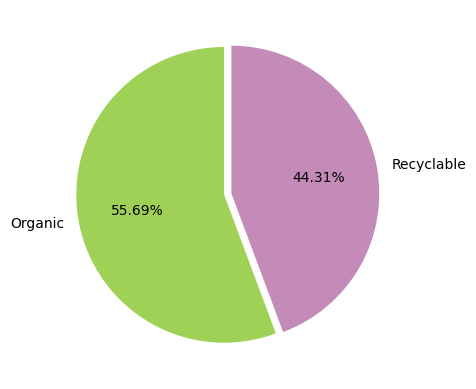

In [14]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels = ['Organic', 'Recyclable'], autopct='%0.2f%%', colors = colors, startangle = 90, explode = [0.025,0.025])
plt.show()

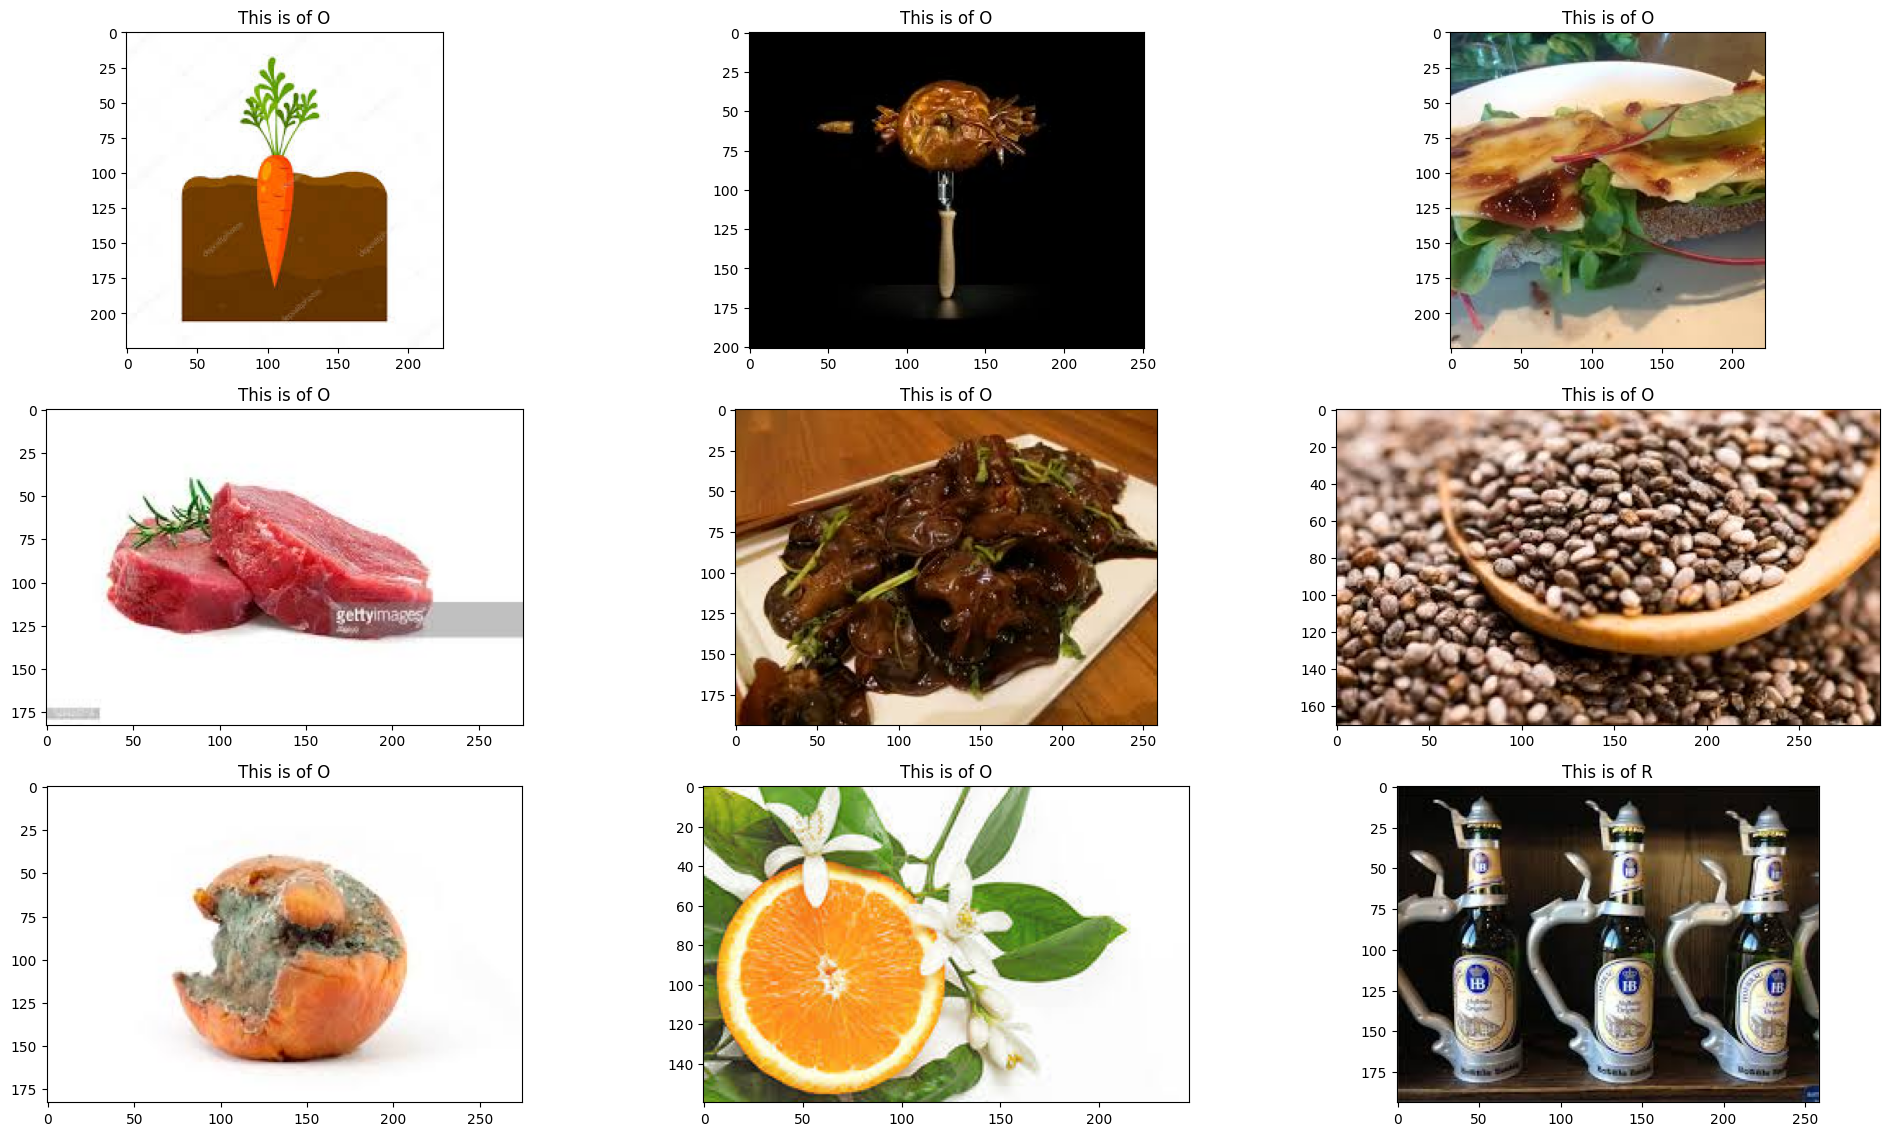

In [15]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [16]:
model = Sequential()

# Input: 150x150
model.add(Conv2D(32, (3,3), input_shape=(150, 150, 3)))  # Keep this
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())  # Output: 17x17x128 = 36992
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 72, 72, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# For 150x150 input
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),  # Must match model input
    batch_size=32,
    class_mode='binary'  # For sigmoid output
)

Found 22564 images belonging to 2 classes.


In [25]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary')

Found 2513 images belonging to 2 classes.


In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,  # Increase epochs
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.7857 - loss: 0.4809 - val_accuracy: 0.8285 - val_loss: 0.3855
Epoch 2/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8364 - loss: 0.3865 - val_accuracy: 0.8766 - val_loss: 0.3069
Epoch 3/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8587 - loss: 0.3455 - val_accuracy: 0.8667 - val_loss: 0.3248
Epoch 4/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.8771 - loss: 0.2980 - val_accuracy: 0.9037 - val_loss: 0.2542
Epoch 5/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.8917 - loss: 0.2703 - val_accuracy: 0.9017 - val_loss: 0.2637
Epoch 6/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.9075 - loss: 0.2314 - val_accuracy: 0.9113 - val_loss: 0.2575
Epoch 7/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.9207 - loss: 0.1974 - val_accuracy: 0.9140 - val_loss: 0.2844
Epoch 8/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.9408 - loss: 0.1539 - 

In [39]:
def predict_image(image_path):
    """Predicts the class of an image.

    Args:
        image_path: The path to the image file.

    Returns:
        The predicted class of the image ("Organic" or "Recyclable").
    """
    # image_path is expected to be a string (file path)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150))
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    return "The image is Organic" if prediction[0][0] < 0.5 else "The image is Recyclable"

In [40]:

# Call predict_image with the image path directly
test_img_path = '/content/O_12576.jpg'  # Store the path in a variable
prediction = predict_image(test_img_path)  # Pass the path to the function
print(prediction)  # Print the prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The image is Organic


In [41]:

# Call predict_image with the image path directly
test_img_path = '/content/R_10124.jpg'  # Store the path in a variable
prediction = predict_image(test_img_path)  # Pass the path to the function
print(prediction)  # Print the prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The image is Recyclable
